Loan status prediction is a critical task in the banking and financial sector, where lenders need to assess the risk of loan default before approving applications. Machine learning (ML) models can automate and enhance this decision-making process by analyzing historical loan data to predict whether a borrower will repay the loan or default.

Why Loan Status Prediction?

Risk Management: Helps financial institutions minimize losses by identifying high-risk borrowers.

Automation: Reduces manual effort in loan approval processes.

Fairness: Ensures unbiased decisions by relying on data-driven insights rather than subjective judgment.

Efficiency: Speeds up loan processing by quickly classifying applicants.

Key Challenges


Imbalanced Data: Most loans are repaid, leading to fewer default cases (class imbalance).

Feature Importance: Identifying the most influential factors (e.g., income, credit score, loan amount).

Model Interpretability: Banks need explainable models to justify loan rejections.

In [3]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [4]:
#loading the dataset to a pandas dataframe

loan_dataset=pd.read_csv('/content/loan_dataset.csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
#printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.shape

(614, 13)

In [8]:
#sattistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
#checking for missing values
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Handle Missing Values**

Fill missing LoanAmount with median (since it's numerical).

Fill missing Credit_History with mode (since it's categorical (0/1)).

In [46]:
# Categorical columns - fill with mode (most frequent category)
cat_cols = ['Gender', 'Married', 'Dependents', 'Credit_History','Self_Employed']
for col in cat_cols:
    loan_dataset[col].fillna(loan_dataset[col].mode()[0], inplace=True)

# Numerical columns - fill Loan_Amount_Term with median
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].median(), inplace=True)
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(), inplace=True)

<ipython-input-46-515c05808e67>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset[col].fillna(loan_dataset[col].mode()[0], inplace=True)
<ipython-input-46-515c05808e67>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [47]:
#label encoding
loan_dataset.replace({"Loan_Status" : {'N':0,'Y':1}},inplace=True)
loan_dataset.replace({"Gender" : {'Male':1,'Female':0}},inplace=True)

<ipython-input-47-517e1ee98d1e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Gender" : {'Male':1,'Female':0}},inplace=True)


In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [18]:
#dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [14]:
#repalcing the value of 3+ to 4
loan_dataset=loan_dataset.replace(to_replace='3+', value=4)

In [15]:
#dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [19]:
loan_dataset['Credit_History'].value_counts()

,count
Credit_History,
1.0,525
0.0,89


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

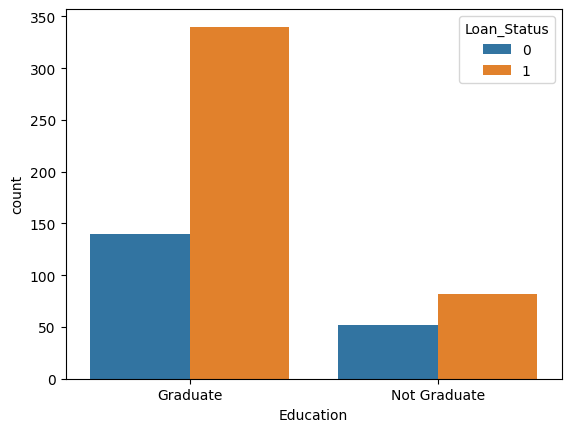

In [20]:
#education and loan status

sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

**Insight:** Shows whether loan is approved if person is gratuated

<Axes: xlabel='Married', ylabel='count'>

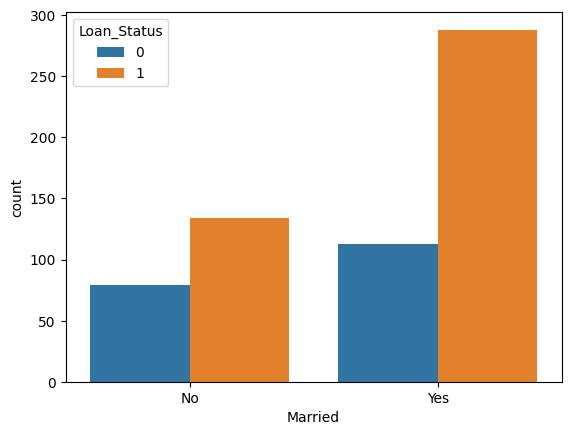

In [21]:
#marital status and loan status


sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

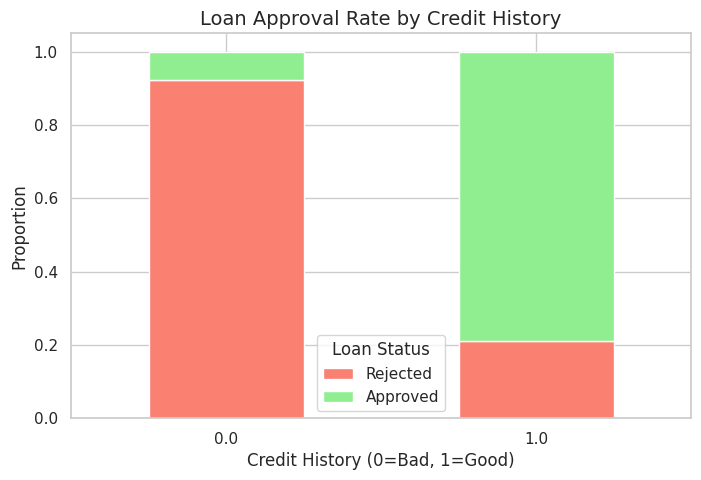

In [28]:
pd.crosstab(loan_dataset['Credit_History'], loan_dataset['Loan_Status'], normalize='index').plot(
    kind='bar',
    stacked=True,
    color=['salmon', 'lightgreen'],
    figsize=(8, 5)
)
plt.title("Loan Approval Rate by Credit History", fontsize=14)
plt.xlabel("Credit History (0=Bad, 1=Good)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(["Rejected", "Approved"], title="Loan Status")
plt.xticks(rotation=0)
plt.show()

**Insight**: Shows how credit history drastically affects approval rates.

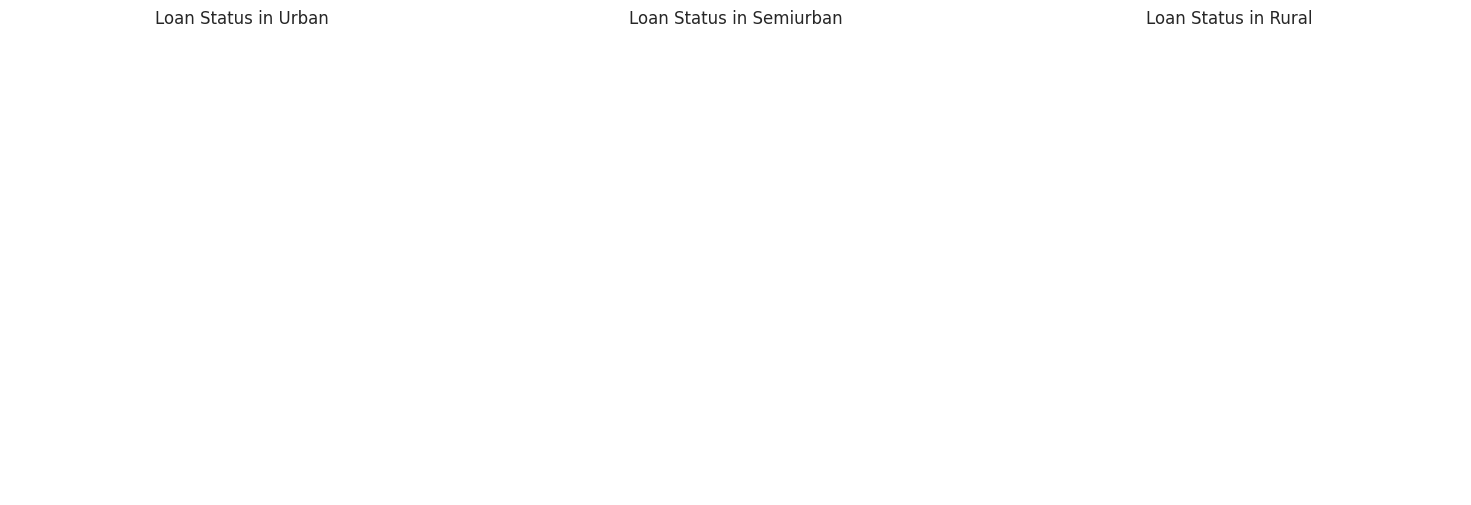

In [30]:
plt.figure(figsize=(15, 5))
property_areas = ['Urban', 'Semiurban', 'Rural']

for i, area in enumerate(property_areas, 1):
    plt.subplot(1, 3, i)
    subset = loan_dataset[loan_dataset['Property_Area'] == area]
    status_counts = subset['Loan_Status'].value_counts()

    # Automatically handle labels/colors
    status_counts.plot(
        kind='pie',
        labels=['Rejected', 'Approved'],  # Always show both labels
        colors=['salmon', 'lightgreen'],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"Loan Status in {area}")
    plt.ylabel("")  # Hide default 'Loan_Status' label

plt.tight_layout()
plt.show()

Data Processing

In [22]:
#convert categorical columns to numerical columns
loan_dataset.replace({'Married': {'No':0,'Yes':1},
                      'Gender': {'M':1,'F':0},
                      'Self_Employed': {'No':0,'Yes':1},
                      'Property_Area': {'Rural':0, 'Semiurban': 1, 'Urban':2},
                      'Education': {'Not Graduate':0,'Graduate':1}},inplace=True)

<ipython-input-22-850a725f299f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married': {'No':0,'Yes':1},


In [23]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,Male,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,Male,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,Male,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,Male,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0


In [37]:
# separating the data and label

X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1) #as we are removing column so axis=1, for row axis=0
Y=loan_dataset['Loan_Status']

In [38]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0      Male        0          0          1              0             5849   
1      Male        1          1          1              0             4583   
2      Male        1          0          1              1             3000   
3      Male        1          0          0              0             2583   
4      Male        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609  Female        0          0          1              0             2900   
610    Male        1          4          1              0             4106   
611    Male        1          1          1              0             8072   
612    Male        1          2          1              0             7583   
613  Female        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi


Train Test Split

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=7)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


  Training the Model:

  Support Vector Machine

In [45]:
classifier=svm.SVC(kernel='linear')

In [54]:
#training the Support Vector Machine model
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is a categorical column in your dataset
label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.fit_transform(X_test['Gender'])

# Now train the SVM
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [51]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score on training data: ",training_data_accuracy)

Accuracy score on training data:  0.8085539714867617


In [55]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score on test data: ",test_data_accuracy)

Accuracy score on test data:  0.7723577235772358
